In [1]:
# %matplotlib notebook

import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


import warnings
from scipy.stats import norm

import sys
sys.path.append(r'D:\MATH3094\LinearRegression')
sys.path.append(r'D:\MATH3094\TikhonovRegularization')
from linearregression import LinearModel
from tikhonovregularization import TikhonovModel

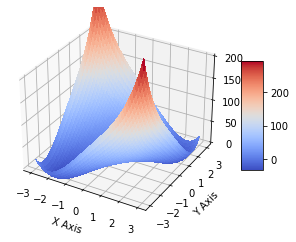

In [2]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

x = y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X ** 4 + Y ** 4 - 16 * X * Y

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.show()

In [3]:
def E(u, v): return u ** 4 + v ** 4 - 16 * u * v

eta = 0.01
x, y = 1.2, 1.2
print(0, f'x={x}', f'y={y}', f'E={E(x, y)}', sep='\t \t')
for i in range(1, 31):
    g = 4 * x ** 3 - 16 * y
    h = 4 * y ** 3 - 16 * x
    x = x - eta * g
    y = y - eta * h
    # print(i, f'x={round(x, 3)}', f'y={round(y, 3)}', f'E={round(E(x, y), 3)}', sep='\t \t')
print(i, f'x={round(x, 3)}', f'y={round(y, 3)}', f'E={round(E(x, y), 3)}', sep='\t \t')

0	 	x=1.2	 	y=1.2	 	E=-18.8928
30	 	x=2.0	 	y=2.0	 	E=-32.0


In [4]:
def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-1 * x))

In [5]:
def squared_error(*, actuals, predicted) -> float:
    return np.square(predicted - actuals).sum()


def mean_squared_error(*, actuals, predicted) -> float:
    return np.square(predicted - actuals).sum() / actuals.shape[0]


def mean_absolute_percentage_error(*, actuals, predicted) -> float:
    return np.sum(np.abs(predicted - actuals) / actuals) / actuals.shape[0]


def i_dont_know_what_this_is_but_here_it_is(*, actuals, predicted) -> float:
    return (-1 / actuals.shape[0]) * np.sum((2 - actuals) * np.log(predicted) + (actuals - 1) * np.log(1 - predicted))

In [6]:
# Import Data
filename = r'D:\MATH3094\data\multivar_simulated\data.csv'
data = np.genfromtxt(filename, skip_header=1, delimiter=',')

Y = data[:, 1]
X1 = data[:, 2:]
X = np.concatenate([X1, np.ones(shape=(X1.shape[0], 1))], axis=1)

The error function is given by
$$ E = \sum_{j=1}^{N} (y_j-\sum_{s=1}^{k+1} x_{js}m_{s})^2 .$$

In [7]:
def squared_error(actuals, *, predicted=None, predictors=None, linear_weights=None) -> float:
    """
    Calculates the Squared Error

    Either the predicted values or the model_inputs and weights need to be supplied
    :param actuals: A numpy ndarray of actual values
    :param predicted: A numpy ndarray of predictions
    :param predictors: A numpy ndarray of predictors
    :param linear_weights: The weights for a linear model for the predictors
    :return: The squared error
    """
    if predicted is not None:
        try:
            return np.square(predicted - actuals).sum()
        except:
            warnings.warn('There was an error')
            return np.inf
    elif (predictors is not None) and (linear_weights is not None):
        try:
            return np.square(actuals - np.matmul(predictors, linear_weights)).sum()
        except:
            warnings.warn('There was an error')
            return np.inf
    else:
        raise ValueError

The gradient of $E$ is given by
$$ \nabla E  = -2 X^{\intercal}Y + 2
X^{\intercal}XM. $$

In [8]:
def get_gradient_linear(actuals, predictors, linear_weights):
    """
    Calculates the gradient
    :return: The gradient
    """
    if not isinstance(actuals, np.ndarray):
        raise ValueError
    if not isinstance(predictors, np.ndarray):
        raise ValueError
    if not isinstance(linear_weights, np.ndarray):
        raise ValueError
    try:
        return 2 * (np.matmul(np.matmul(predictors.transpose(), predictors), linear_weights)
                    - np.matmul(predictors.transpose(), actuals))
    except:
        warnings.warn('There was an error')
        return linear_weights * np.inf

In [9]:
# Now we run this
step_size = 0.0001
number_of_steps = 100000
model_weights = np.array([1, 1, 1], dtype=np.dtype(float))

initial_error = squared_error(Y, predictors=X, linear_weights=model_weights)
print(initial_error)

13157.654112000984


In [10]:
for _ in range(number_of_steps):
    # We calculate the gradient
    # Then we move in that direction in our step size
    model_weights -= step_size * get_gradient_linear(Y, X, model_weights)
print(model_weights)
print(squared_error(Y, predictors=X, linear_weights=model_weights))

[ 1.78777492 -3.47899986  6.0608333 ]
77.72956041736886


## Newton's Method

In [11]:
def E(u, v): return u ** 4 + v ** 4 - 16 * u * v


eta = 1
x, y = 1.2, 1.2
print(0, f'x={x}', f'y={y}', f'E={E(x, y)}', sep='\t\t')
for i in range(0, 10):
    d = 9 * x ** 2 * y ** 2 - 16
    g = (3 * x ** 3 * y ** 2 - 8 * y ** 3 - 16 * x) / d
    h = (3 * x ** 2 * y ** 3 - 8 * x ** 3 - 16 * y) / d
    x = x - eta * g
    y = y - eta * h
    print(i + 1, f'x={np.round(x, 3)}', f'y={np.round(y, 3)}', f'E={np.round(E(x, y))}', sep='\t\t')

0		x=1.2		y=1.2		E=-18.8928
1		x=10.8		y=10.8		E=25344.0
2		x=7.283		y=7.283		E=4779.0
3		x=4.981		y=4.981		E=834.0
4		x=3.509		y=3.509		E=106.0
5		x=2.623		y=2.623		E=-15.0
6		x=2.169		y=2.169		E=-31.0
7		x=2.018		y=2.018		E=-32.0
8		x=2.0		y=2.0		E=-32.0
9		x=2.0		y=2.0		E=-32.0
10		x=2.0		y=2.0		E=-32.0


### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

In [12]:
filepath = r'D:\MATH3094\data\haberman.data'
df = pd.read_csv(filepath, header=None)

In [13]:
# Load Data
mydata = np.genfromtxt(filepath, delimiter=',')
X = mydata[:, 0:3]
Y = mydata[:, -1]

In [14]:
# Add column of ones
X = np.concatenate([X, np.ones(shape=(X.shape[0], 1))], axis=1)

In [15]:
# Convert target to 0-1 (1 died within 5 years, 0 died after 5 years)
Y = Y % 2

In [16]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Instead of doing it completly randomly I will randomly split the death cases and the alive cases
# This should be fine and should be a better representation since the data is not evenly distributed (225 deaths, 81 alive)
# Without this each run can have very differnt results
death_rows = np.where(Y == 1)[0]
alive_rows = np.where(Y != 1)[0]

X_train_death, X_test_death, Y_train_death, Y_test_death = train_test_split(X[death_rows], Y[death_rows], test_size=0.3)
X_train_alive, X_test_alive, Y_train_alive, Y_test_alive = train_test_split(X[alive_rows], Y[alive_rows], test_size=0.3)

X_train = np.append(X_train_death, X_train_alive, axis=0)
X_test = np.append(X_test_death, X_test_alive, axis=0)
Y_train = np.append(Y_train_death, Y_train_alive, axis=0)
Y_test = np.append(Y_test_death, Y_test_alive, axis=0)

In [17]:
def logistic_squared_error(actuals, *, predicted=None, predictors=None, weights=None) -> float:
    """
            Calculates the error for logistic regression

            Either the predicted values or the model_inputs and weights need to be supplied
            :param weights: The weights for a linear model for the predictors
            :param actuals: A numpy ndarray of actual values
            :param predicted: A numpy ndarray of predictions
            :param predictors: A numpy ndarray of predictors
            :return: The squared error
    """
    if predicted is not None:
        pass
    elif (predictors is not None) and (weights is not None):
        y_n = sigmoid(np.matmul(predictors, weights))
    else:
        raise ValueError
    t_n = actuals.flatten()
    return (-1 / actuals.shape[0]) * np.sum((2 - t_n) * np.log(y_n) + (t_n - 1) * np.log(1 - y_n))
#     return np.square(y_n - t_n).sum() / y_n.shape[0]
#     return np.sum(np.abs(t_n - y_n) / y_n) / y_n.shape[0]

# def logistic_squared_error(actuals, *, predicted=None, predictors=None, weights=None, error: object = i_dont_know_what_this_is_but_here_it_is) -> float:
#     """
#             Calculates the error for logistic regression

#             Either the predicted values or the model_inputs and weights need to be supplied
#             :param error: The function to use when calculating error
#             :param weights: The weights for a linear model for the predictors
#             :param actuals: A numpy ndarray of actual values
#             :param predicted: A numpy ndarray of predictions
#             :param predictors: A numpy ndarray of predictors
#             :return: The squared error
#     """
#     if predicted is not None:
#         pass
#     elif (predictors is not None) and (weights is not None):
#         y_n = sigmoid(np.matmul(predictors, weights))
#     else:
#         raise ValueError
#     t_n = actuals.flatten()
#     return error(actuals = t_n, predicted = y_n)

w = np.array([0, 0, 0, 0])
print(logistic_squared_error(Y_train, weights = w, predictors=X_train))

0.6931471805599453


In [18]:
def logistic_squared_gradient(actuals, predictors, weights):
    """
    The gradient for logistic regression
    """
    if not isinstance(actuals, np.ndarray):
        raise ValueError
    if not isinstance(predictors, np.ndarray):
        raise ValueError
    if not isinstance(weights, np.ndarray):
        raise ValueError
    y_n = sigmoid(np.matmul(predictors, weights))
    t_n = actuals.flatten()
    return 1 / predictors.shape[0] * np.matmul(np.transpose(predictors), (y_n - t_n))

In [19]:
model_weights = np.array([0, 0, 0, 0], dtype=np.dtype(float))
step_size = 0.005
number_of_steps = 100000

initial_error = logistic_squared_error(Y_train, predictors=X_train, weights=model_weights)
print(initial_error)

for i in range(number_of_steps):
    # print(logistic_squared_gradient(Y_train, X_train, model_weights))
    model_weights -= step_size * logistic_squared_gradient(Y_train, X_train, model_weights)

    if i % 10000 == 0:
        print(model_weights, logistic_squared_error(Y_train, predictors=X_train, weights=model_weights))

print(model_weights)
print(logistic_squared_error(Y_train, predictors=X_train, weights=model_weights))

0.6931471805599453
[ 0.06008216  0.07444836 -0.00043427  0.00118545] -2.0736979523250296
[ 0.05724071  0.17161189 -0.35707095  0.07051771] -2.8311258705198763
[-0.01001782  0.09083712 -0.36584675  0.13659587] -0.22679213793243339
[-0.05241061  0.03984434 -0.36615949  0.20256487] 2.8584257840208154
[ 0.05720688  0.1685     -0.35730315  0.27080464] -2.8310746562892857
[-0.01004989  0.08775392 -0.36607374  0.33514259] -0.22680449447734996
[-0.05245856  0.0367711  -0.36638428  0.39938676] 2.859184059558304
[ 0.05717208  0.16546819 -0.35752473  0.46591749] -2.831005055014411
[-0.010083    0.08474997 -0.36629039  0.52856205] -0.22678796688059083
[-0.05250619  0.0337779  -0.36659875  0.5911278 ] 2.8599149061712206
[-0.05252199  0.03279767 -0.36666804  0.65392986]
2.8601526602500544


In [20]:
def plot_predicted_class_probabilities_histogram(actuals_and_predictions, *, title=None):
    # We need to split this up into two groups
    data0 = actuals_and_predictions[np.where(actuals_and_predictions[:, 0] == 0)]
    data1 = actuals_and_predictions[np.where(actuals_and_predictions[:, 0] == 1)]
    plt.hist(data0[:, 1], bins=500, density=True, alpha=0.6, color='green', label='Actual No Death')
    plt.hist(data1[:, 1], bins=500, density=True, alpha=0.6, color='red', label='Actual Death')
    #plt.yscale('log')
    plt.xlabel("Predicted Death")
    plt.ylabel("Count")
    if title is not None:
        plt.title(title)
    else:
        plt.title("Predicted Class Probabilities")
    plt.legend()
    plt.show()

def plot_predicted_class_probabilities_normals_fitted(actuals_and_predictions, *, title=None):
    # We need to split this up into two groups
    data0 = actuals_and_predictions[np.where(actuals_and_predictions[:, 0] == 0)]
    data1 = actuals_and_predictions[np.where(actuals_and_predictions[:, 0] == 1)]
    # data1 = data1[np.where(data1[:,1] != 0)]
    mu0, std0 = np.mean(data0[:, 1]), np.std(data0[:, 1])
    mu1, std1 = np.mean(data1[:, 1]), np.std(data1[:, 1])
    x = np.linspace(actuals_and_predictions[:, 1].min(), actuals_and_predictions[:, 1].max(), 500)
    y0 = norm.pdf(x, mu0, std0)
    y1 = norm.pdf(x, mu1, std1)
    crossing_point = np.where(np.diff(np.sign(y1 - y0)))[0]
    plt.plot(x, y0, color='green', label='Actual No Death')
    plt.plot(x, y1, color='red', label='Actual Death')
#     plt.xlabel("Predicted Death")
    plt.ylabel("Count normed")
    if title is not None:
        plt.title(title)
    else:
        plt.title("Normal Distributions of Predicted Class Probabilities")
    # plt.title("Normal Distributions of Predicted Class Probabilities Adjusted")
    plt.legend()
    # plt.yscale('log')
    plt.show()
    return x[crossing_point]

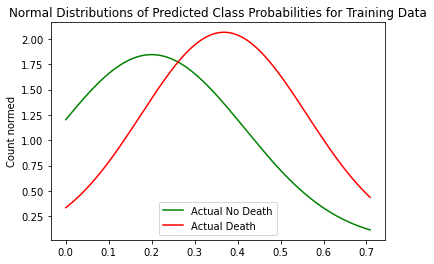

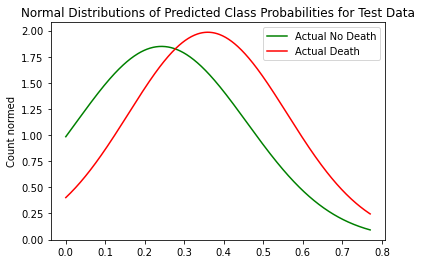

array([0.2763388])

In [21]:
train_predicted_values = sigmoid(np.matmul(X_train, model_weights))
train_actual_values = Y_train
cp = plot_predicted_class_probabilities_normals_fitted(np.column_stack((train_actual_values, train_predicted_values)), title='Normal Distributions of Predicted Class Probabilities for Training Data')

# What is accuracy
test_predicted_values = sigmoid(np.matmul(X_test, model_weights))
test_actual_values = Y_test
plot_predicted_class_probabilities_normals_fitted(np.column_stack((test_actual_values, test_predicted_values)), title='Normal Distributions of Predicted Class Probabilities for Test Data')
# plot_predicted_class_probabilities_histogram(np.column_stack((actual_values, predicted_values)))

In [22]:
# Accuracy
cutoff = 0.5
p1 = np.copy(test_predicted_values)
p1[p1 >= cutoff] = 1
p1[p1 < cutoff] = 0
print(f'Accuracy: {np.sum(test_actual_values == p1) * 100 / test_actual_values.shape[0]}')

# Accuracy
cutoff = cp
print(cp)
p2 = np.copy(test_predicted_values)
p2[p2 >= cutoff] = 1
p2[p2 < cutoff] = 0
print(f'Accuracy: {np.sum(test_actual_values == p2) * 100 / test_actual_values.shape[0]}')

Accuracy: 40.86021505376344
[0.26128511]
Accuracy: 68.81720430107526


# Comparison to a linear model

In [31]:
# Overall this is not great, how does this compare to a linear model?
# I rewrote my linear regression code into a class which should make training this easier

test_model = LinearModel(X_train, Y_train)
test_model.calculate_optimal_model()
print(test_model.model_weights)

train_predicted_values = test_model.predict(X_train)
train_actual_values = Y_train
test_predicted_values = test_model.predict(X_test)
test_actual_values = Y_test

# plot_predicted_class_probabilities_normals_fitted(np.column_stack((test_actual_values, test_predicted_values)), title='Normal Distributions of Predicted Class Probabilities for Test Data')

# Accuracy
cutoff = 0.5
p1 = np.copy(test_predicted_values)
p1[p1 >= cutoff] = 1
p1[p1 < cutoff] = 0
print(f'Accuracy: {np.sum(test_actual_values == p1) * 100 / test_actual_values.shape[0]}')

[-0.00326586 -0.00550006 -0.01943271  1.33649314]
Accuracy: 72.04301075268818
